I/Q swapping and low side frequency conversion exploration

In [4]:
%matplotlib inline
import numpy as np
from scipy import signal, fftpack
from matplotlib import pyplot as plt

Create an input signal consisting of 3 tones in the 100GHz
domain

In [16]:
Fs = 100e9
F1 = -1000e6
F2 = 0e6;
F3 = 1000e6;
t = np.arange(16384)
tone1 = np.cos(2*np.pi*F1/Fs*t) + 1j*np.sin(2*np.pi*F1/Fs*t)
tone2 = 2*(np.cos(2*np.pi*F2/Fs*t) + 1j*np.sin(2*np.pi*F2/Fs*t))
tone3 = 3*(np.cos(2*np.pi*F3/Fs*t) + 1j*np.sin(2*np.pi*F3/Fs*t))
tone_total = tone1 + tone2 + tone3

Plot and see the weakest tone on the 'left'

Text(0.5,1,'Signal at Baseband')

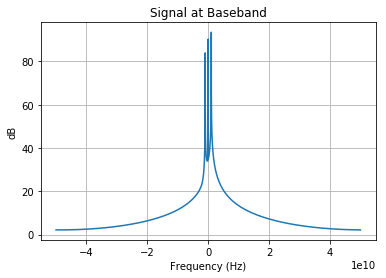

In [17]:
freq_axis = np.linspace(-Fs/2, Fs/2, tone_total.size)
plt.figure(1)
plt.plot(freq_axis, 20*np.log10(np.abs(fftpack.fftshift(fftpack.fft(tone_total)))))
plt.xlabel('Frequency (Hz)')
plt.ylabel('dB')
plt.grid(True)
plt.title('Signal at Baseband')

Swap I and Q and see frequency inversion

Text(0.5,1,'Signal at Baseband Inverted I/Q')

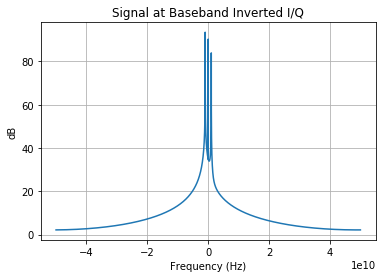

In [18]:
sig_i = tone_total.imag
sig_q = tone_total.real
sig_total = sig_i + 1j*sig_q
plt.figure(1)
plt.plot(freq_axis, 20*np.log10(np.abs(fftpack.fftshift(fftpack.fft(sig_total)))))
plt.xlabel('Frequency (Hz)')
plt.ylabel('dB')
plt.grid(True)
plt.title('Signal at Baseband Inverted I/Q')

In [20]:
freq_UC1 = 1750e6
freq_UC2 = 2750e6;
freq_UC3 = 10.25e9;
freq_UC4 = 20.5e9
freq_UC5 = 22e9

sig_if1 = sig_total * (np.cos(2*np.pi*freq_UC1/Fs*t) + 1j*np.sin(2*np.pi*freq_UC1/Fs*t))

Text(0.5,1,'Signal at IF Inverted I/Q')

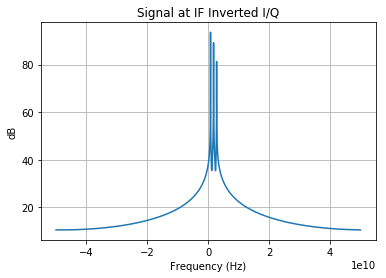

In [21]:
plt.figure(1)
plt.plot(freq_axis, 20*np.log10(np.abs(fftpack.fftshift(fftpack.fft(sig_if1)))))
plt.xlabel('Frequency (Hz)')
plt.ylabel('dB')
plt.grid(True)
plt.title('Signal at IF Inverted I/Q')

Text(0.5,1,'Signal at IF  10.25  Inverted I/Q')

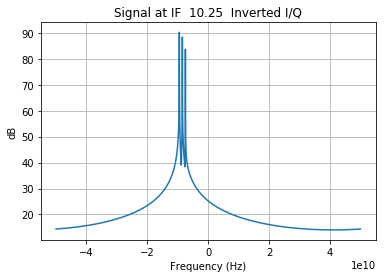

In [28]:
sig_if2 = sig_if1 * (np.cos(2*np.pi*freq_UC3/Fs*t) - 1j*np.sin(2*np.pi*freq_UC3/Fs*t))
plt.plot(freq_axis, 20*np.log10(np.abs(fftpack.fftshift(fftpack.fft(sig_if2)))))
plt.xlabel('Frequency (Hz)')
plt.ylabel('dB')
plt.grid(True)
plt.title('Signal at IF  10.25  Inverted I/Q')

Negative frequencies don't make much sense, what actually happens is I/Q are inverted again

In [27]:
sig_rf = sig_if2.imag + 1j * sig_if2.real

Text(0.5,1,'Signal at IF  10.25  Inverted I/Q')

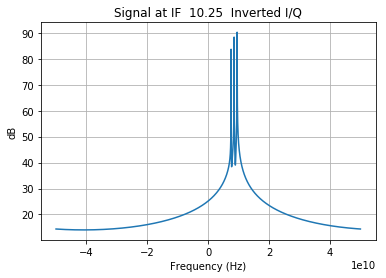

In [29]:
plt.plot(freq_axis, 20*np.log10(np.abs(fftpack.fftshift(fftpack.fft(sig_rf)))))
plt.xlabel('Frequency (Hz)')
plt.ylabel('dB')
plt.grid(True)
plt.title('Signal at IF  10.25  Inverted I/Q')